In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import copy

#한글깨짐방지
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings("ignore")

In [3]:
path = 'D:/Python/블로그크롤링/output/20일 중복x 21일 중복o 비교/단어빈도_표'

In [758]:
#불용어
out_word = ["맛있다","모두","가장","소개","추천","다른","방문","주변","자리","지금","포스팅","느낌",
            "지역","가지","직접","사용","입구","어떻다","날씨","타고","출발","이제","이다",
            "사실",'가면','주문','근처',
            "시원하다","좋아하다","유명하다",'설명','소리',
            "강원",'시청','공소','진호','사장','완전','먹기']
#             "속초","속초시","해수욕장"] #속초해수욕장전용
#             "양양군"]
#            "강릉시","해수욕장","경포","강릉","경포대"] ##경포전용
#             "양양","낙산","해수욕장","양양군",'낙산사','강현면'] ## 낙산 전용
           

### 제외할단어가 있으면 제외하고 다음단어 
* 상위 50개를 선택하고 rank를 역순으로 먹였다 (위에서부터 1등임)

In [738]:
one_set = os.listdir(path)[21:]

In [739]:
def word_change(word):
    word = word.replace('경포대','경포')
    word = word.replace('강릉시','강릉')
    word = word.replace('양양군','양양')
    word = word.replace('속초시','속초')
    return word

In [740]:
# 카테고리설정
category = dict()
# category['특정음식'] = ['막국수','감자','옥수수','고기','메밀','물회','오징어','순대','순두부','짬뽕','두부','칼국수']
# category['숙소'] = ['펜션','호텔','숙소']
# category['가족'] = ['아이','가족','친구']
#감정어 일단 배제
# category['부정어']= ['작다']
# category['긍정어'] = ['예쁘다', '아름답다', '멋지다', '다양하다','신나다']
category['계절'] = ['겨울', '여름', '가을']

category['식당'] = ['맛집', '식당', '카페', '음식', '커피', '횟집', '대게','가자미','생선','구이','닭강정','튀김','새우',
                   '막국수', '감자', '옥수수', '고기', '메밀', '물회', '오징어', '순대', '순두부', '짬뽕', '두부', '칼국수',
                   '오징어순대','만석','국물','아바이','식사','메밀국수','바베큐']

category['자연'] = ['단풍', '풍경', '나무', '바람', '자연', '공원', '자연휴양림', '호수', '국립공원',
                    '동해', '해수욕장', '바닷가', '계곡', '비치', '해수', '파도', '맞이','모래','물놀이','하늘','일출']

category['핫플레이스'] = ['대관령', '알파카', '목장', '거리', '마을', '경포', '정동진', '오죽헌', '초당', '박물관', '안목', '주문진', 
                          '강문', '테라로사', '바위', '온천','경포호', '낙산사', '본당', '설악산', '수산항','관음', 
                          '금강산','골목','갯배','축제', '체험', '코스', '여행지','등대','금정','설악','대포항','중앙시장','동명',
                          '옹치','조대','오색','선림','낙산','휴암','죽도','미천']

category['주변지역'] = ['정선', '속초', '서울', '강릉', '평창', '고성', '인제', '양양', '경기도', '강현면','홍천']


category['휴가'] = ['휴가', '구경', '관광', '문화', '시설', '객실', '스카이', '베이',
                    '펜션', '호텔', '숙소', '아이', '가족', '친구','예약','리조트','콘도','게스트하우스',]

category['무소속']= ['공간', '가격', '건물', '버스', '고속도로', '도로', '방향', '개장', '운영', '출구', '주차장','주차','촬영',
                  '터미널','귀농',
                     '즐겁다','작다','예쁘다', '아름답다', '멋지다', '다양하다','신나다','아쉽다','작다','이쁘다','멀리']

category['엑티비티'] = ['번지', '자전거', '낚시', '바다낚시','서핑','캠핑장','캠핑','강습']

In [762]:
ori_out_word = copy.deepcopy(out_word)

In [786]:
year_rate_df.sum(axis = 1).sum()

300.0

In [828]:
category.keys()

dict_keys(['계절', '식당', '자연', '핫플레이스', '주변지역', '휴가', '무소속', '엑티비티'])

In [834]:
one_set

['2020-04-21_양양 +강원도_628_20100101~20101231_단어빈도.csv',
 '2020-04-21_양양 +강원도_811_20150101~20151231_단어빈도.csv',
 '2020-04-21_양양 +강원도_817_20190101~20191231_단어빈도.csv']

In [840]:
os.listdir(path)[39:]

['2020-04-21_양양 +강원도_628_20100101~20101231_단어빈도.csv',
 '2020-04-21_양양 +강원도_811_20150101~20151231_단어빈도.csv',
 '2020-04-21_양양 +강원도_817_20190101~20191231_단어빈도.csv']

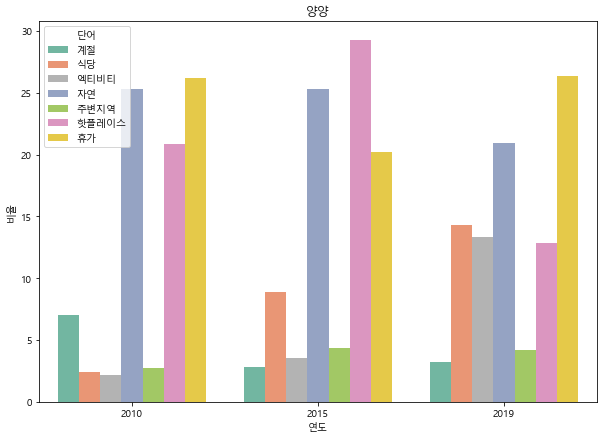

In [841]:
#특정컬러로
current_palette = sns.color_palette("Set2", 8)
color_dic = dict()
for i,key in enumerate(category.keys()):
    color_dic[key] = current_palette[i]

not_in_lst = []
# for i in range(21,42,3): #전체
for i in range(39,40,3):
    one_set = os.listdir(path)[i:]

    out_word = list(set(ori_out_word)) #out_word초기화
    # keyword는 stopword로 
    main_keyword = one_set[0].split('_')[1].split(' ')[0]
    if main_keyword == "":
        main_keyword = '강원도'
    out_word.append(main_keyword)
    if "해수욕장" in main_keyword:
        out_word.append("해수욕장")
        out_word.append(main_keyword.split("해수욕장")[0])

    for i in range(0,3):
        sample = pd.read_csv(path + "/"+ one_set[i])
        year = one_set[i].split("_")[3][:4]

        #상위권중 불용어제외하고 15개만 선택
        head_sameple = sample['word'][:50]
        head_sameple = head_sameple.apply(word_change) #단어조정
        selected = head_sameple[~head_sameple.isin(out_word)]
        selected = selected[:30]
        count_df = pd.DataFrame(selected).reset_index(drop = True)
        count_df = pd.merge(count_df,sample, on = 'word')
        count_df = count_df.rename(columns ={'counted': year+"_counted"})
        #상위권이 위로가게끔
        if i == 0:
            m_count_df = count_df
        else :
            m_count_df = pd.merge(m_count_df,count_df, on = 'word',how = 'outer')

    m_count_df['2010_rate'] = m_count_df['2010_counted'].apply(lambda x : (x/m_count_df['2010_counted'].sum())*100)
    m_count_df['2015_rate'] = m_count_df['2015_counted'].apply(lambda x : (x/m_count_df['2015_counted'].sum())*100)
    m_count_df['2019_rate'] = m_count_df['2019_counted'].apply(lambda x : (x/m_count_df['2019_counted'].sum())*100)

    year_rate_df = pd.DataFrame()
    rate_cols = m_count_df.columns[-3:].values
    for col in rate_cols:
        year = col.split('_')[0]
        count_dict = dict()
        not_nun_ls = list(m_count_df['word'][~np.isnan(m_count_df[col])].values) #nan이 아닌 워드만
        check_ls = list(m_count_df['word'][~np.isnan(m_count_df[col])].values) #체크용
        for word in not_nun_ls:   
    #         print('현재 단어',word)
            for key in category.keys(): 
                if word in category[key]:
                    count_dict[key] = count_dict.get((key),0) + m_count_df[m_count_df['word'].isin([word])][col].iloc[0]
    #                 print("--------들어감",word)
                    check_ls.remove(word)
        #아무데도 안들어간 word
        if check_ls != []:
            print("**무소속**",check_ls)
            not_in_lst.append(check_ls)
        one_year_df = pd.DataFrame(count_dict,index = [year])
        year_rate_df = pd.concat([year_rate_df,one_year_df])
    if year_rate_df.sum(axis =1).sum() != 300:
        print(main_keyword,"무소속발생")

    year_rate_df.reset_index(inplace = True)
    m_year_rate_df = pd.melt(year_rate_df,id_vars = 'index')
    m_year_rate_df = m_year_rate_df.rename(columns={'index': '연도','variable':'단어','value':'비율'})
    m_year_rate_df['연도'] = m_year_rate_df['연도'].astype(int)
    m_year_rate_df = m_year_rate_df[m_year_rate_df['단어'] != '무소속']

    
#     current_palette =sns.hls_palette(m_year_rate_df['단어'].nunique(), l=.5, s=.8)
    plt.figure(figsize=(10,7))
    sns.barplot(x = '연도',y='비율',hue ='단어',data = m_year_rate_df,palette=color_dic)
    plt.title(main_keyword,)
    plt.savefig('D:/Python/블로그크롤링/output/상위 30개 키워드 카테고리/'+main_keyword+'.png', bbox_inches='tight', pad_inches=0.05)

In [843]:
m_count_df[m_count_df['word'] == '친구']

,word,2010_counted,2015_counted,2019_counted,2010_rate,2015_rate,2019_rate
49,친구,NaN,NaN,347.0,NaN,NaN,1.965226


### heatmap

In [781]:
bad_word = ['작다']
good_word = ['즐겁다','예쁘다', '아름답다', '멋지다', '다양하다','신나다','아쉽다','이쁘다']

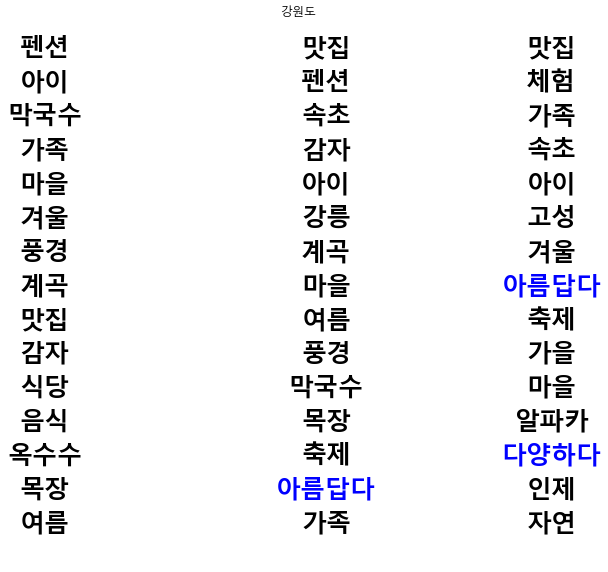

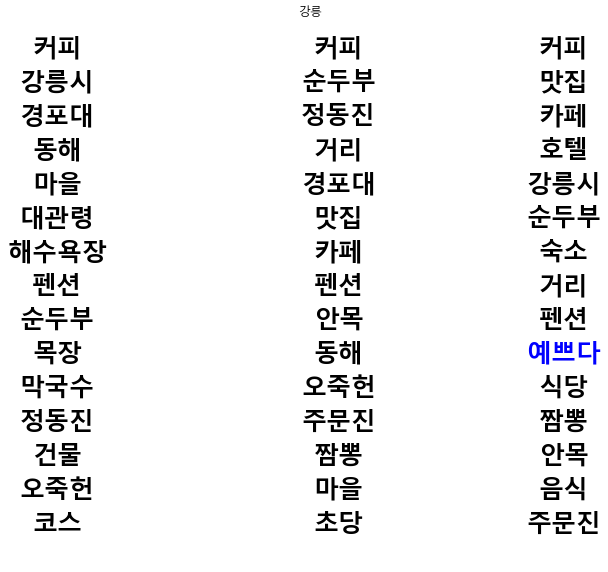

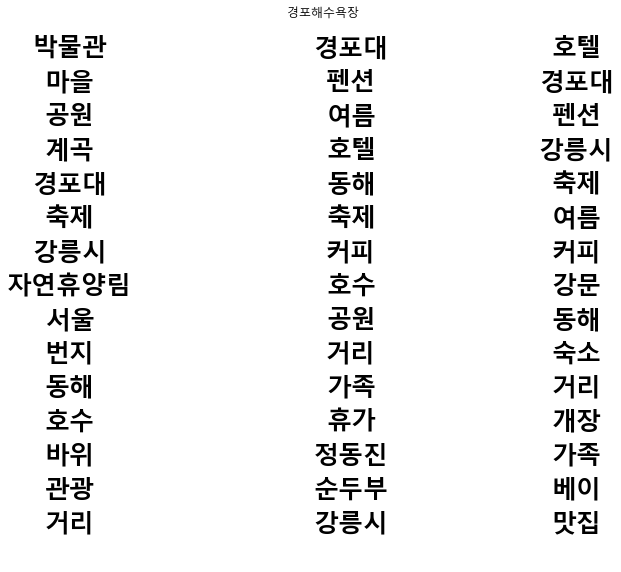

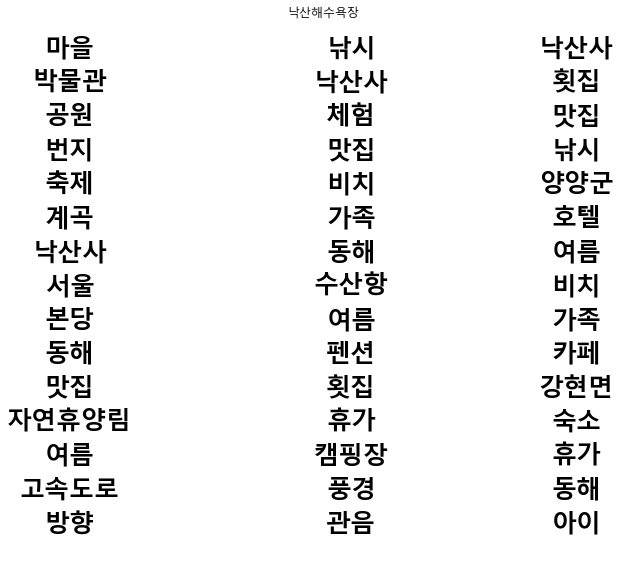

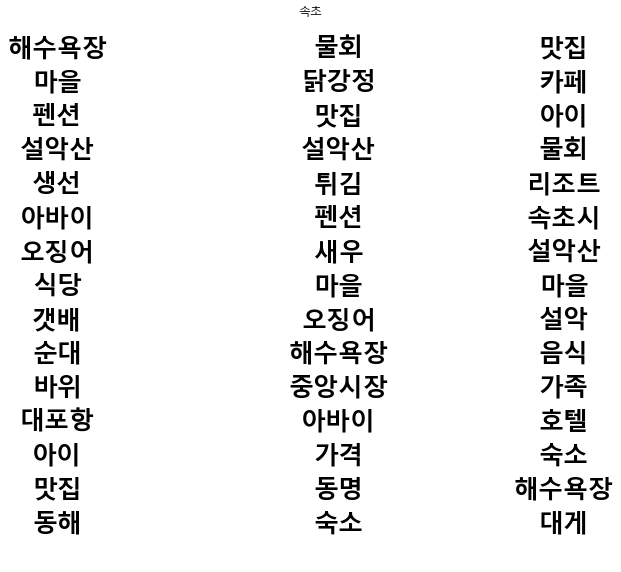

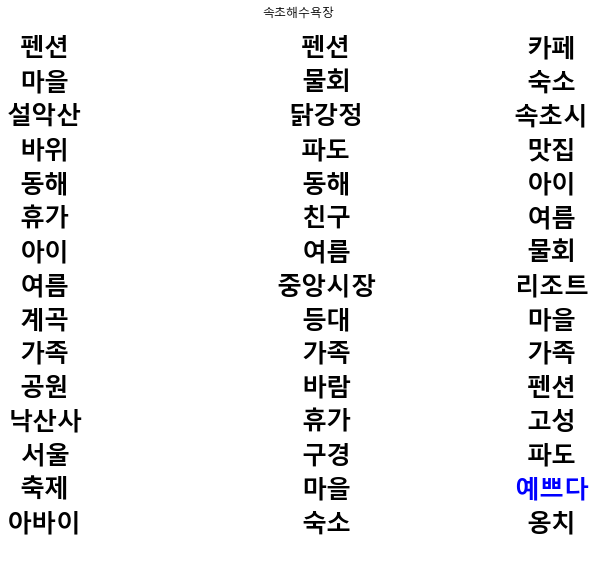

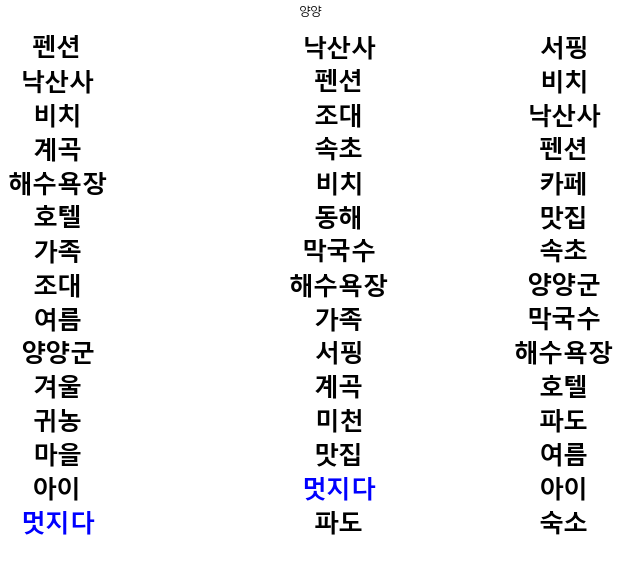

In [823]:
for i in range(21,42,3):
    one_set = os.listdir(path)[i:]

    out_word = list(set(ori_out_word)) #out_word초기화
    # keyword는 stopword로 
    main_keyword = one_set[0].split('_')[1].split(' ')[0]
    if main_keyword == "":
        main_keyword = '강원도'
    out_word.append(main_keyword)
    if "해수욕장" in main_keyword:
        out_word.append("해수욕장")
        out_word.append(main_keyword.split("해수욕장")[0])
    for i in range(0,3):
        sample = pd.read_csv(path + "/"+ one_set[i])
        year = one_set[i].split("_")[3][:4]

        #상위권중 불용어제외하고 15개만 선택
        head_sameple = sample['word'][:50]
        selected = head_sameple[~head_sameple.isin(out_word)]
        selected = selected[:15]
        ranked = pd.DataFrame(selected).reset_index(drop = True)
        #상위권이 위로가게끔
        ranked[year] = range(15,0,-1)
        if i == 0:
            m_ranked = ranked
        else :
            m_ranked = pd.merge(m_ranked,ranked, on = 'word',how = 'outer')


    #멜팅
    mm_ranked = m_ranked.melt(id_vars = 'word')
    mm_ranked['variable'] = mm_ranked['variable'].apply(lambda x : int(x.split("_")[0]))
    mm_ranked= mm_ranked.dropna()

    mm_ranked.reset_index(drop=True,inplace =True)
    mm_ranked = mm_ranked.rename(columns = {"variable":"year"})

    #히트맵그래프
    plt.figure(figsize=(10,10))
    ax = sns.scatterplot(y= 'value', x = 'year',data = mm_ranked,color ='w')
    for line in range(0, mm_ranked.shape[0]):
        if mm_ranked.word[line] in bad_word:
            ax.text(mm_ranked.year[line],mm_ranked.value[line],mm_ranked.word[line], horizontalalignment='center', size=25, color='red', weight='semibold')
        elif mm_ranked.word[line] in good_word:
            ax.text(mm_ranked.year[line],mm_ranked.value[line],mm_ranked.word[line], horizontalalignment='center', size=25, color='blue', weight='semibold')    
        else :
            ax.text(mm_ranked.year[line],mm_ranked.value[line],mm_ranked.word[line], horizontalalignment='center', size=25, color='black', weight='semibold')
    ax.set_ylim(0,16)
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    plt.axis('off')
    plt.title(main_keyword,)
    plt.savefig('D:/Python/블로그크롤링/output/히트맵/'+main_keyword+'.png', bbox_inches='tight', pad_inches=0.05)
    plt.show()    